In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
pd.options.display.max_columns = 999


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from plotly.offline import plot, iplot
#init_notebook_mode(connected = True)
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## version 0

In [42]:
df_price = pd.read_csv('../data/player_price.csv')
df_stats = pd.read_csv('../data/player_stats.csv')

In [43]:
df_price['Date'] = pd.to_datetime(df_price['timestamp'], unit='ms')
df_price.drop(['timestamp'], axis=1, inplace=True)
df_price['Year']= df_price['Date'].dt.year
df_price['Month'] = df_price['Date'].dt.month
df_price['year_month'] = df_price['Year'].astype(str) + "_" +\
                            df_price['Month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)

In [44]:
df_merge=pd.merge(df_price,df_stats,on='player_id', how='inner')

In [45]:
df_merge=df_merge.loc[(df_merge['xbox_price']>100000) & (df_merge['ps_price']!=0)]
df_merge

,ps_price,xbox_price,player_id,player_name,Date,Year,Month,year_month,acceleration,aggression,agility,balance,ball,composure,crossing,curve,defending,diving,dribbling,finishing,fk,handling,heading,interceptions,jumping,kicking,long,marking,pace,passing,penalties,physicality,positioning,raits,reactions,reflexes,shooting,short,shot,sliding,specialities,speed,sprint,stamina,standing,strength,vision,volleys,cam,cb,cdm,cf,cm,lb,lf,lm,lw,lwb,rb,rf,rm,rw,rwb,st,added_on,age,att_workrate,club,def_workrate,foot,height,intl_reputation,league,name,nation,origin,revision,skills,weak_foot,weight,colour,front_scores,overall_score,position,rareness
20749,4080957,3699148,18947,Cristiano Ronaldo,2017-06-09,2017,6,2017_06,96,72,97,68,99,86,94,91,48,0,99,99,86,0,99,42,99,0,80,32,98,91,91,92,99,"['Takes Powerful Driven Free Kicks', 'Flair', ...",99,0,99,92,99,33,"['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",0,98,99,45,92,95,94,96,63,71,98,89,70,98,96,97,74,70,98,96,97,74,98,2017-06-08,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,TOTS-LaLiga,TOTS,5,4,80,gold,"{'PHY': '92', 'DEF': '48', 'DRI': '99', 'PAS':...",99,LW,rare
20750,3251661,3073447,18947,Cristiano Ronaldo,2017-06-10,2017,6,2017_06,96,72,97,68,99,86,94,91,48,0,99,99,86,0,99,42,99,0,80,32,98,91,91,92,99,"['Takes Powerful Driven Free Kicks', 'Flair', ...",99,0,99,92,99,33,"['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",0,98,99,45,92,95,94,96,63,71,98,89,70,98,96,97,74,70,98,96,97,74,98,2017-06-08,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,TOTS-LaLiga,TOTS,5,4,80,gold,"{'PHY': '92', 'DEF': '48', 'DRI': '99', 'PAS':...",99,LW,rare
20751,3141748,3086910,18947,Cristiano Ronaldo,2017-06-11,2017,6,2017_06,96,72,97,68,99,86,94,91,48,0,99,99,86,0,99,42,99,0,80,32,98,91,91,92,99,"['Takes Powerful Driven Free Kicks', 'Flair', ...",99,0,99,92,99,33,"['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",0,98,99,45,92,95,94,96,63,71,98,89,70,98,96,97,74,70,98,96,97,74,98,2017-06-08,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,TOTS-LaLiga,TOTS,5,4,80,gold,"{'PHY': '92', 'DEF': '48', 'DRI': '99', 'PAS':...",99,LW,rare
20752,3020879,3110350,18947,Cristiano Ronaldo,2017-06-12,2017,6,2017_06,96,72,97,68,99,86,94,91,48,0,99,99,86,0,99,42,99,0,80,32,98,91,91,92,99,"['Takes Powerful Driven Free Kicks', 'Flair', ...",99,0,99,92,99,33,"['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",0,98,99,45,92,95,94,96,63,71,98,89,70,98,96,97,74,70,98,96,97,74,98,2017-06-08,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,TOTS-LaLiga,TOTS,5,4,80,gold,"{'PHY': '92', 'DEF': '48', 'DRI': '99', 'PAS':...",99,LW,rare
20753,3081459,2923158,18947,Cristiano Ronaldo,2017-06-13,2017,6,2017_06,96,72,97,68,99,86,94,91,48,0,99,99,86,0,99,42,99,0,80,32,98,91,91,92,99,"['Takes Powerful Driven Free Kicks', 'Flair', ...",99,0,99,92,99,33,"['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",0,98,99,45,92,95,94,96,63,71,98,89,70,98,96,97,74,70,98,96,97,74,98,2017-06-08,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,TOTS-LaLiga,TOTS,5,4,80,gold,"{'PHY': '92', 'DEF': '48', 'DRI': '99', 'PAS':...",99,LW,rare
20754,2995687,2900399,18947,Cristiano Ronaldo,2017-06-14,2017,6,2017_06,96,72,97,68,99,86,94,91,48,0,99,99,86,0,99,42,99,0,80,32,98,91,91,92,99,"['Takes Powerful Driven Free Kicks', 'Flair', ...",99,0,99,92,99,33,"['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",0,98,99,45,92,95,94,96,63,71,98,89,70,98,96,97,74,70,98,96,97,74,98,2017-06-08,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,TOTS-LaLiga,TOTS,5,4,80,gold,"{'PHY': '92', 'DEF': '48', 'DRI': '99', 'PAS':...",99,LW,rare
20755,2933250,2964771,18947,Cristiano Ronaldo,2017-06-15,2017,6,2017_06,96,72,97,68,99,86,94,91,48,0,99,99,86,0,99,42,99,0,80,32,98,91,91,92,99,"['Takes Powerful Driven Free Kicks', 'Flair', ...",99,0,99,92,99,33,"['Speedster', 'Aerial Threat', 'Dribbler', 'Di..

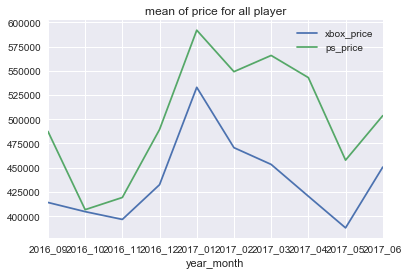

In [47]:
df_merge.groupby(df_merge.year_month)['xbox_price','ps_price'].mean().plot()
plt.title('mean of price for all player')

ball
99    1.524691e+06
97    1.398432e+06
98    8.827073e+05
Name: xbox_price, dtype: float64
ball
99    1.752121e+06
97    1.544489e+06
98    1.003797e+06
Name: ps_price, dtype: float64


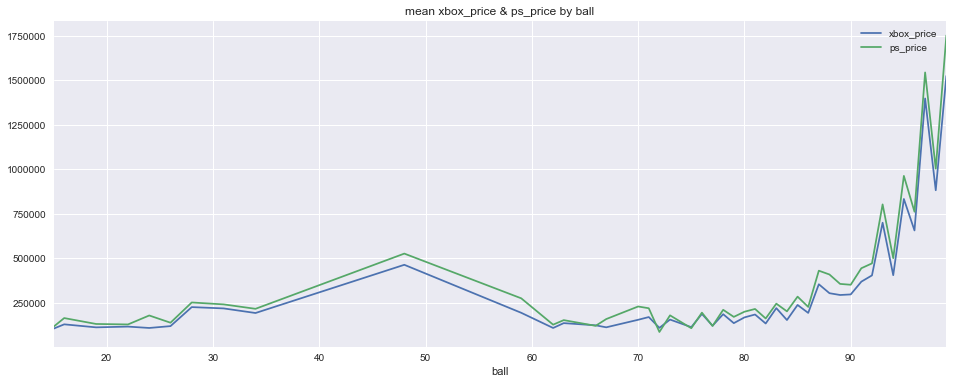

In [53]:
print(df_merge.groupby('ball')['xbox_price'].mean().sort_values(ascending=False)[:3])
print(df_merge.groupby('ball')['ps_price'].mean().sort_values(ascending=False)[:3])

plt.figure(figsize=(16,6))
df_merge.groupby('ball')['xbox_price'].mean().plot()
df_merge.groupby('ball')['ps_price'].mean().plot()
plt.legend()
plt.title('mean xbox_price & ps_price by ball')

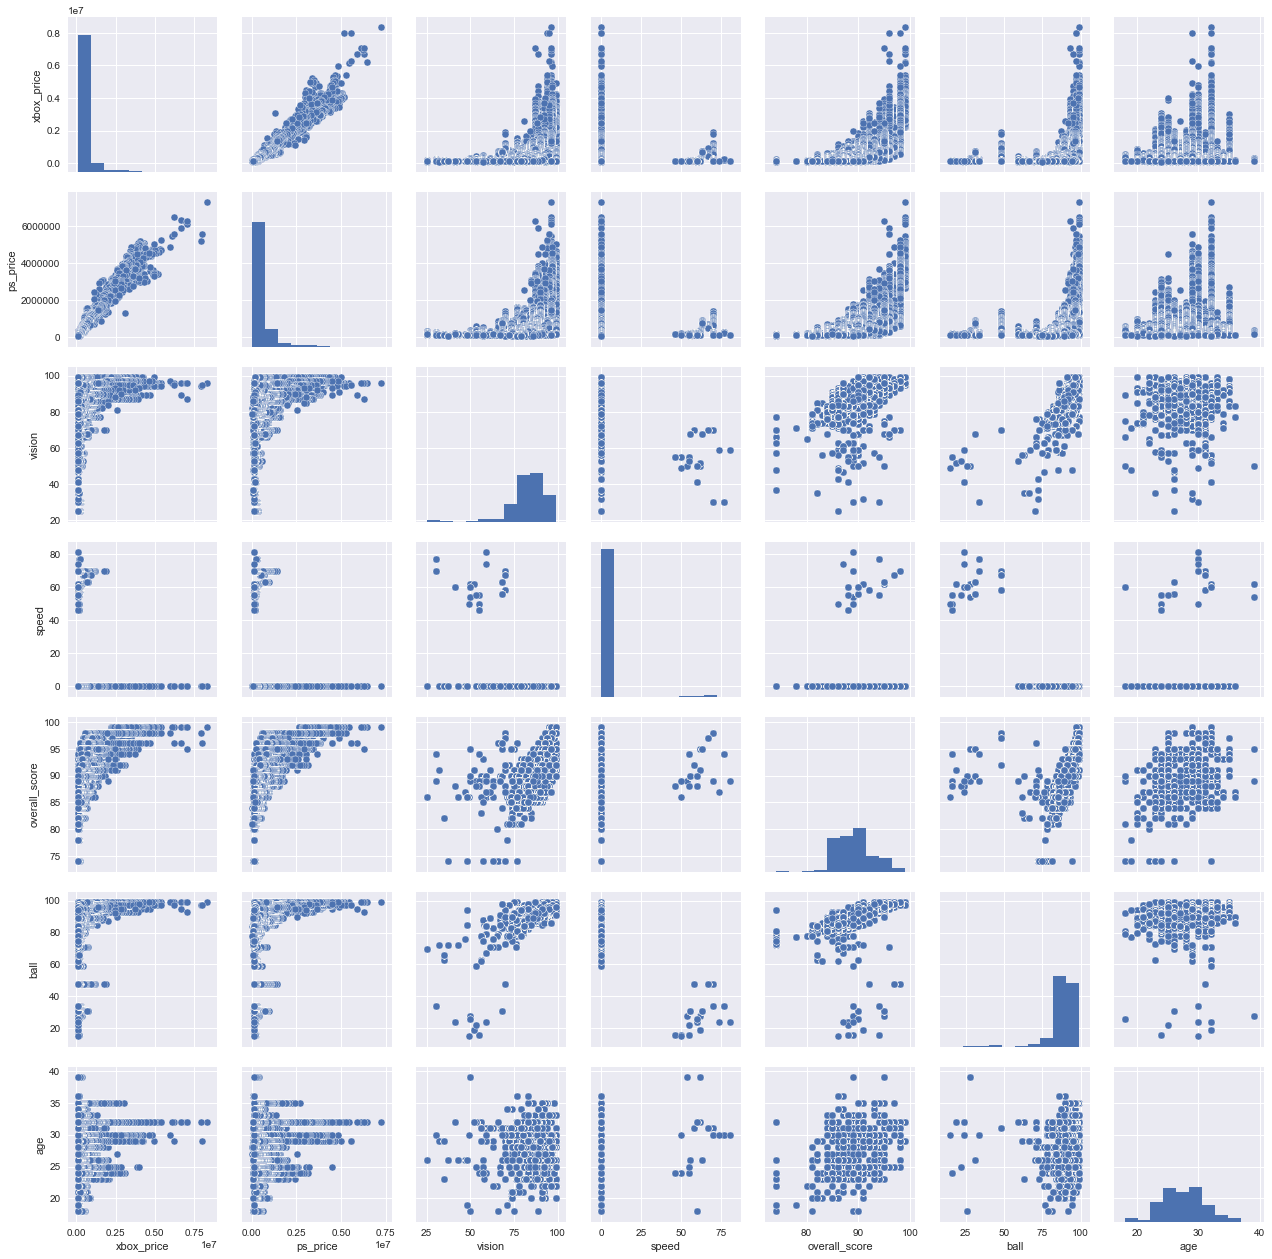

In [34]:
sns_ = ['xbox_price','ps_price','vision','speed','overall_score','ball','age']
sns.pairplot(df_merge[sns_])

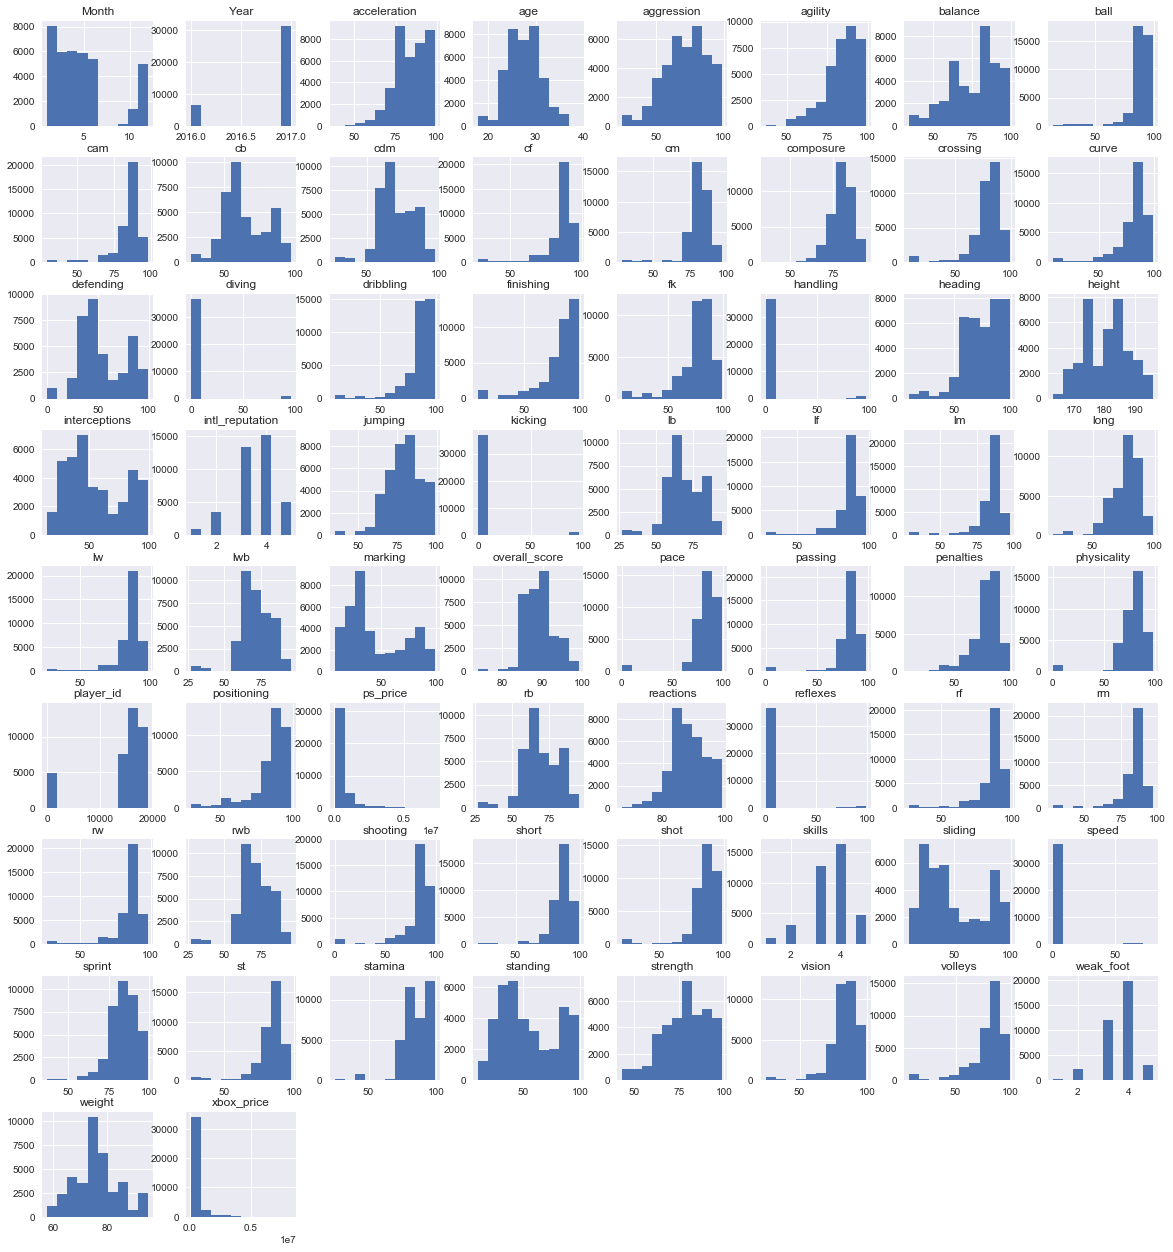

In [34]:
features = list(set(df_merge.columns) - set(['player_name','raits','specialities','att_workrate',
                                             'club','def_workrate','foot','league','name','nation',
                                            'origin','revision','colour','front_scores','position','rareness']))

df_merge[features].hist(figsize=(20,22));

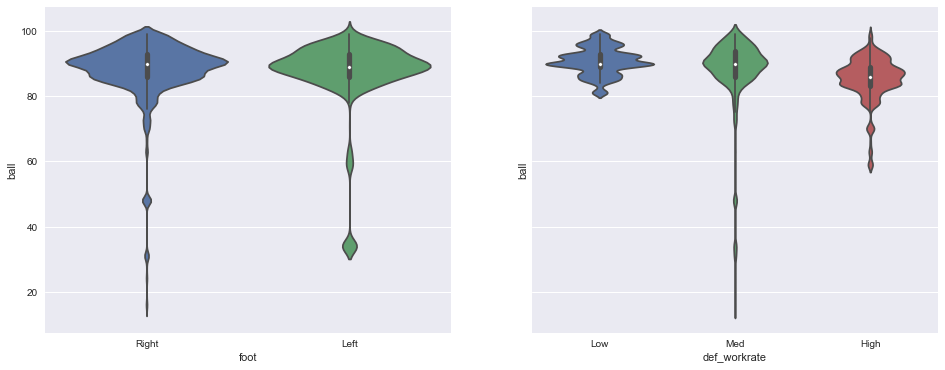

In [16]:
_, axes = plt.subplots(1,2, sharey=True, figsize=(16,6))

sns.violinplot(x='foot', y='ball', data=df_merge, ax=axes[0])
sns.violinplot(x='def_workrate', y='ball', data=df_merge, ax=axes[1])

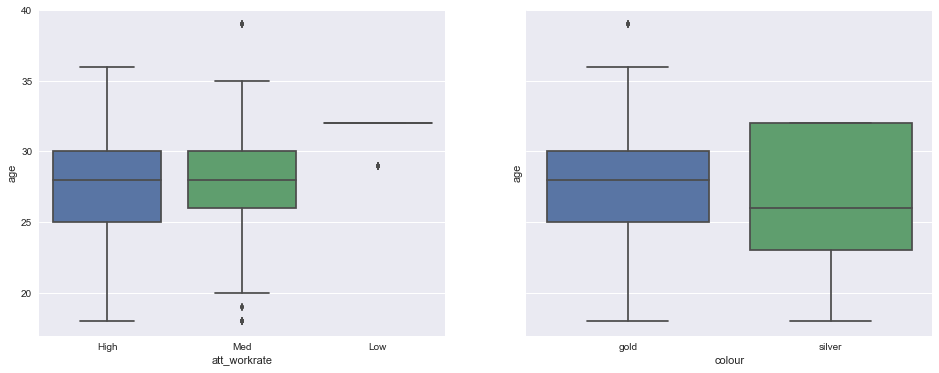

In [33]:
_, axes = plt.subplots(1,2, sharey=True, figsize=(16,6))

sns.boxplot(x='att_workrate', y='age', data=df_merge, ax=axes[0])
sns.boxplot(x='colour', y='age', data=df_merge, ax=axes[1])

-----------

## version 1

In [2]:
df_price = pd.read_csv('../data/player_price.csv')
df_stats = pd.read_csv('../data/player_stats.csv')

In [3]:
df_price['Date'] = pd.to_datetime(df_price['timestamp'], unit='ms')
df_price.drop(['timestamp'], axis=1, inplace=True)
df_price['Year']= df_price['Date'].dt.year
df_price['Month'] = df_price['Date'].dt.month
df_price['year_month'] = df_price['Year'].astype(str) + '_' +\
                         df_price['Month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)

In [4]:
df_price.drop(['ps_price'],axis = 1, inplace=True)
df_price.rename(columns={'xbox_price':'price'}, inplace = True)
df_price['Name_ID'] = df_price['player_name'] + "_" +  df_price['player_id'].astype(str)

In [5]:
df_merge=pd.merge(df_price,df_stats,on='player_id', how='inner')

In [26]:
df_merge.revision.value_counts()

Normal          812208
IF               71943
Legend           20748
SIF              13902
OTW               9335
SBC               8617
TOTGS             5572
TOTS              5225
Halloween         4655
CMOTM             4381
TIF               4098
MOTM              3794
Movember          3715
IMOTM             3323
TOTY              1794
AW                1649
StPatrick         1485
FIF               1428
FUT Birthday      1260
Hero               671
Premium SBC        252
RB                  63
HERO                50
TOTS-Reward         27
Name: revision, dtype: int64

In [6]:
df_merge_revision_normal=df_merge[df_merge.revision=='Normal']

In [7]:
df_merge_revision_normal

,price,player_id,player_name,Date,Year,Month,year_month,Name_ID,acceleration,aggression,agility,balance,ball,composure,crossing,curve,defending,diving,dribbling,finishing,fk,handling,heading,interceptions,jumping,kicking,long,marking,pace,passing,penalties,physicality,positioning,raits,reactions,reflexes,shooting,short,shot,sliding,specialities,speed,sprint,stamina,standing,strength,vision,volleys,cam,cb,cdm,cf,cm,lb,lf,lm,lw,lwb,rb,rf,rm,rw,rwb,st,added_on,age,att_workrate,club,def_workrate,foot,height,intl_reputation,league,name,nation,origin,revision,skills,weak_foot,weight,colour,front_scores,overall_score,position,rareness
22109,1730000,2,Cristiano Ronaldo,2016-09-23,2016,9,2016_09,Cristiano Ronaldo_2,91,63,90,63,92,86,84,81,33,0,93,93,77,0,87,29,95,0,72,22,92,81,85,80,94,"['Takes Powerful Driven Free Kicks', 'Flair', ...",96,0,92,82,94,23,"['Speedster', 'Dribbler', 'Distance Shooter', ...",0,92,92,31,80,85,88,89,53,61,91,81,61,91,89,91,65,61,91,89,91,65,91,2016-09-21,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,N\A,Normal,5,4,80,gold,"{'PHY': '80', 'DEF': '33', 'DRI': '91', 'PAS':...",94,LW,rare
22110,1687125,2,Cristiano Ronaldo,2016-09-24,2016,9,2016_09,Cristiano Ronaldo_2,91,63,90,63,92,86,84,81,33,0,93,93,77,0,87,29,95,0,72,22,92,81,85,80,94,"['Takes Powerful Driven Free Kicks', 'Flair', ...",96,0,92,82,94,23,"['Speedster', 'Dribbler', 'Distance Shooter', ...",0,92,92,31,80,85,88,89,53,61,91,81,61,91,89,91,65,61,91,89,91,65,91,2016-09-21,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,N\A,Normal,5,4,80,gold,"{'PHY': '80', 'DEF': '33', 'DRI': '91', 'PAS':...",94,LW,rare
22111,1685727,2,Cristiano Ronaldo,2016-09-25,2016,9,2016_09,Cristiano Ronaldo_2,91,63,90,63,92,86,84,81,33,0,93,93,77,0,87,29,95,0,72,22,92,81,85,80,94,"['Takes Powerful Driven Free Kicks', 'Flair', ...",96,0,92,82,94,23,"['Speedster', 'Dribbler', 'Distance Shooter', ...",0,92,92,31,80,85,88,89,53,61,91,81,61,91,89,91,65,61,91,89,91,65,91,2016-09-21,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,N\A,Normal,5,4,80,gold,"{'PHY': '80', 'DEF': '33', 'DRI': '91', 'PAS':...",94,LW,rare
22112,1585871,2,Cristiano Ronaldo,2016-09-26,2016,9,2016_09,Cristiano Ronaldo_2,91,63,90,63,92,86,84,81,33,0,93,93,77,0,87,29,95,0,72,22,92,81,85,80,94,"['Takes Powerful Driven Free Kicks', 'Flair', ...",96,0,92,82,94,23,"['Speedster', 'Dribbler', 'Distance Shooter', ...",0,92,92,31,80,85,88,89,53,61,91,81,61,91,89,91,65,61,91,89,91,65,91,2016-09-21,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,N\A,Normal,5,4,80,gold,"{'PHY': '80', 'DEF': '33', 'DRI': '91', 'PAS':...",94,LW,rare
22113,1441457,2,Cristiano Ronaldo,2016-09-27,2016,9,2016_09,Cristiano Ronaldo_2,91,63,90,63,92,86,84,81,33,0,93,93,77,0,87,29,95,0,72,22,92,81,85,80,94,"['Takes Powerful Driven Free Kicks', 'Flair', ...",96,0,92,82,94,23,"['Speedster', 'Dribbler', 'Distance Shooter', ...",0,92,92,31,80,85,88,89,53,61,91,81,61,91,89,91,65,61,91,89,91,65,91,2016-09-21,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,N\A,Normal,5,4,80,gold,"{'PHY': '80', 'DEF': '33', 'DRI': '91', 'PAS':...",94,LW,rare
22114,1333889,2,Cristiano Ronaldo,2016-09-28,2016,9,2016_09,Cristiano Ronaldo_2,91,63,90,63,92,86,84,81,33,0,93,93,77,0,87,29,95,0,72,22,92,81,85,80,94,"['Takes Powerful Driven Free Kicks', 'Flair', ...",96,0,92,82,94,23,"['Speedster', 'Dribbler', 'Distance Shooter', ...",0,92,92,31,80,85,88,89,53,61,91,81,61,91,89,91,65,61,91,89,91,65,91,2016-09-21,32,High,Real Madrid,Low,Right,185,5,LaLiga Santander,Cristiano Ronaldo,Portugal,N\A,Normal,5,4,80,gold,"{'PHY': '80', 'DEF': '33', 'DRI': '91', 'PAS':...",94,LW,rare
22115,1309672,2,Cristiano Ronaldo,2016-09-29,2016,9,2016_09,Cristiano Ronaldo_2,91,63,90,63,92,86,84,81,33,0,93,93,77,0,87,29,95,0,72,22,92,81,85,80,94,"['Takes Powerful Driven Free Kicks', 'Flair', ...",96,0,92,82,94,23,"['Speedster', 'Dribbler', 'Distanc

In [27]:
#df_merge_revision_normal.loc[df_merge['price'] > 100000, ['year_month','added_on','player_name','price']]
df_merge_revision_normal.groupby(['Name_ID','year_month'])['price'].last().reset_index()

,Name_ID,year_month,price
0,Abaev_18434,2017_05,1056
1,Abaev_18434,2017_06,1036
2,Abaev_2229,2016_09,600
3,Abaev_2229,2016_10,850
4,Abaev_2229,2016_11,625
5,Abaev_2229,2016_12,1514
6,Abaev_2229,2017_01,1107
7,Abaev_2229,2017_02,742
8,Abaev_2229,2017_03,945
9,Abaev_2229,2017_04,624


In [8]:
df_merge_revision_normal.groupby('year_month')['price'].mean().sort_values(ascending=False)

year_month
2016_10    4996.003220
2016_09    4391.608671
2016_12    4383.307631
2016_11    4352.764055
2017_01    4151.123945
2017_02    3700.745139
2017_03    3680.180924
2017_04    3281.005457
2017_05    2844.671940
2017_06    2636.972940
Name: price, dtype: float64

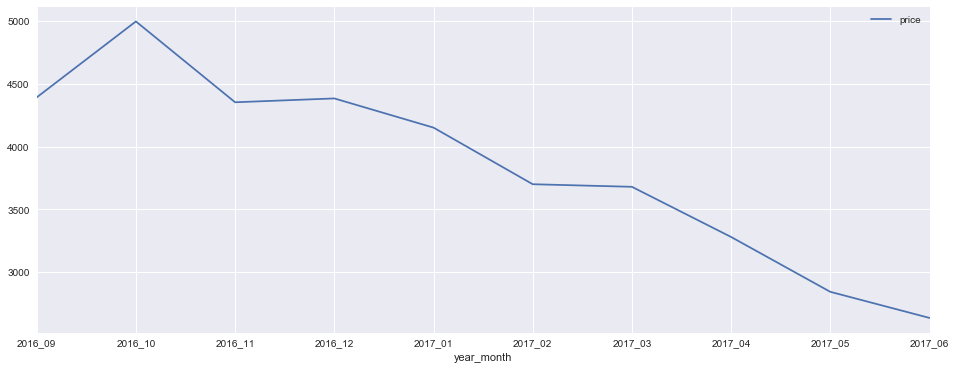

In [9]:
plt.figure(figsize=(16,6))
df_merge_revision_normal.groupby('year_month')['price'].mean().plot()
plt.legend()

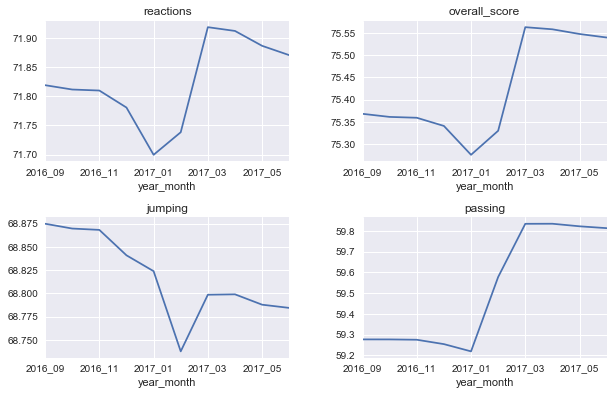

In [248]:
plt.subplot(221)
plt.title('reactions')
df_merge_revision_normal.groupby('year_month')['reactions'].mean().plot()

plt.subplot(222)
plt.title('overall_score')
df_merge_revision_normal.groupby('year_month')['overall_score'].mean().plot()

plt.subplot(223)
plt.title('jumping')
df_merge_revision_normal.groupby('year_month')['jumping'].mean().plot()

plt.subplot(224)
plt.title('passing')
df_merge_revision_normal.groupby('year_month')['passing'].mean().plot()

plt.subplots_adjust(top=1.25, bottom=0.08, left=0.1, right=1.4, hspace=0.4, wspace=0.3)

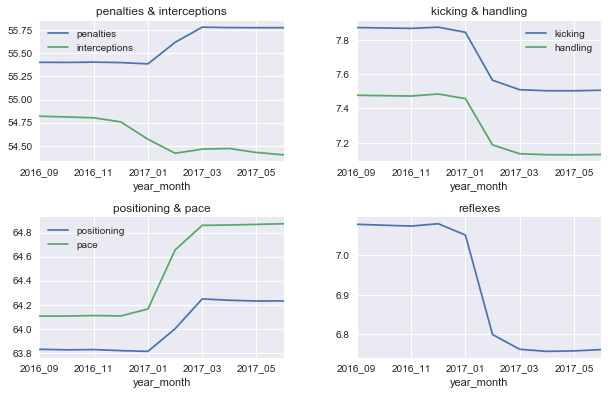

In [257]:
plt.subplot(221)
plt.title('penalties & interceptions')
df_merge_revision_normal.groupby('year_month')['penalties'].mean().plot()
df_merge_revision_normal.groupby('year_month')['interceptions'].mean().plot()
plt.legend()

plt.subplot(222)
plt.title('kicking & handling')
df_merge_revision_normal.groupby('year_month')['kicking'].mean().plot()
df_merge_revision_normal.groupby('year_month')['handling'].mean().plot()
plt.legend()

plt.subplot(223)
plt.title('positioning & pace')
df_merge_revision_normal.groupby('year_month')['positioning'].mean().plot()
df_merge_revision_normal.groupby('year_month')['pace'].mean().plot()
plt.legend()

plt.subplot(224)
plt.title('reflexes')
df_merge_revision_normal.groupby('year_month')['reflexes'].mean().plot()

plt.subplots_adjust(top=1.25, bottom=0.08, left=0.1, right=1.4, hspace=0.4, wspace=0.3)

--------------------------

In [1]:
y = df_merge['price']
y.index = df_merge.Date

NameError: name 'df_merge' is not defined

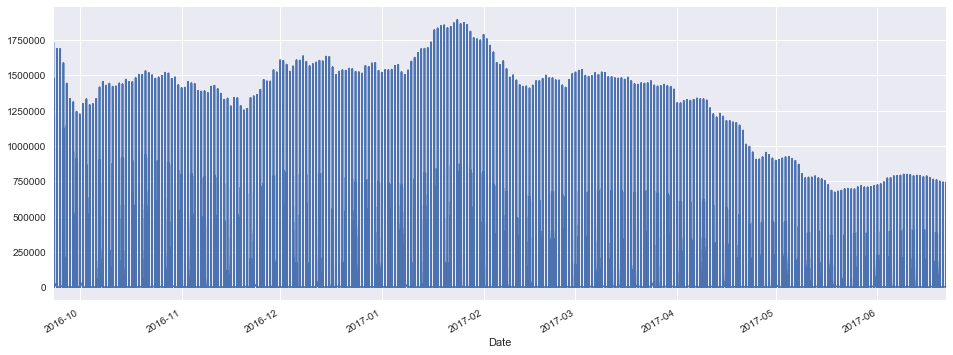

In [449]:
y.plot(figsize=(16,6))

In [ ]:
y_otg=y.resample('D', how='mean')

наличие спадающего трэнда

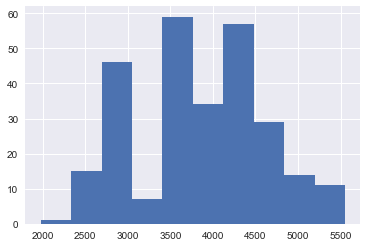

In [451]:
y_otg.hist()

ряд не однородный

In [452]:
itog=y_otg.describe()
itog

count     273.000000
mean     3836.789855
std       741.636721
min      1973.772741
25%      3399.131949
50%      3812.138965
75%      4374.410644
max      5553.257356
Name: price, dtype: float64

In [453]:
print('коэффициент вариации')
print('V = %f' % (itog['std']/itog['mean']))

коэффициент вариации
V = 0.193296


In [455]:
from statsmodels.iolib.table import SimpleTable

print('тест Харки-Бера') #для определения номарльности распределения, чтобы опровергнуть предположение об однородности
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(y_otg)
a = np.vstack([jb_test])
itog = SimpleTable(a, row)
print(itog)

тест Харки-Бера
      JB          p-value           skew          kurtosis  
------------------------------------------------------------
5.10523928379 0.0778773876825 -0.0107079626706 2.33040788321
------------------------------------------------------------


In [457]:
test = sm.tsa.adfuller(y_otg)

print('обобщенный тест Дикки-Фуллера\n') #на наличие единичных корней
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

обобщенный тест Дикки-Фуллера

adf:  -1.18988756061
p-value:  0.677930630077
Critical values:  {'1%': -3.4560535712549925, '5%': -2.8728527662442334, '10%': -2.5727985212493754}
есть единичные корни, ряд не стационарен


=> ряд не стационарен

In [302]:
otg1diff = y_otg.diff(periods=1).dropna()

In [303]:
test = sm.tsa.adfuller(otg1diff)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

adf:  -5.0058085496
p-value:  2.16131426113e-05
Critical values:  {'1%': -3.4561550092339512, '5%': -2.8728972266578676, '10%': -2.5728222369384763}
единичных корней нет, ряд стационарен


In [322]:
len(otg1diff.index)/2+1

137.0

In [323]:
m = otg1diff.index[137]
r1 = sm.stats.DescrStatsW(otg1diff[m:])
r2 = sm.stats.DescrStatsW(otg1diff[:m])
print('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  0.753143390844


высокое p-value дает возможность утверждать, что нулевая гипотеза о равенстве средних верна, что свидетельствует о стационарности ряда 

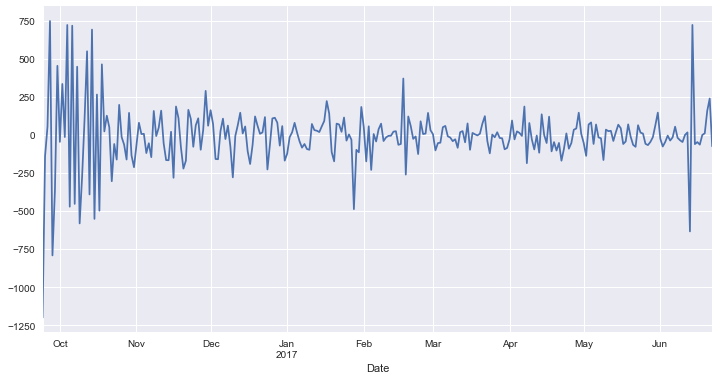

In [324]:
otg1diff.plot(figsize=(12,6))

тренд отсутствует,таким образом ряд первых разностей является стационарным, а исходный ряд — интегрированным рядом первого порядка.

# Построение модели временного ряда

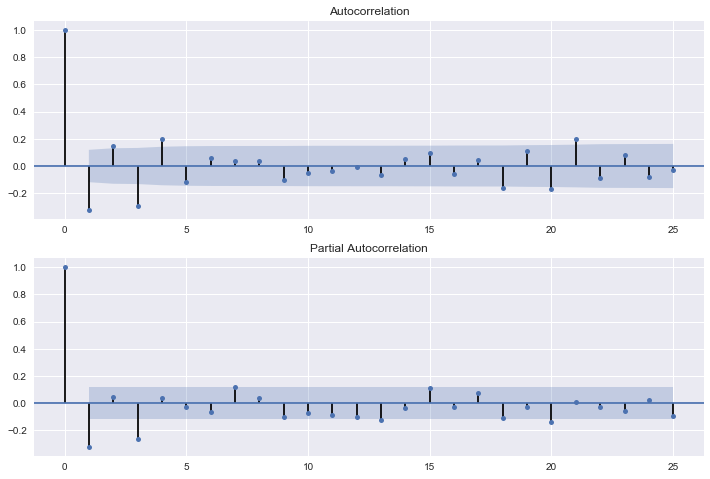

In [330]:
ig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(otg1diff.values.squeeze(), lags=25, ax=ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(otg1diff, lags=25, ax=ax2)

In [347]:
src_data_model = y_otg[:'2017-05-20']
model = sm.tsa.ARIMA(src_data_model, order=(1,1,1), freq='D').fit(full_output=True, disp=0)

In [348]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.price   No. Observations:                  239
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1590.716
Method:                       css-mle   S.D. of innovations            187.991
Date:                Mon, 26 Jun 2017   AIC                           3189.431
Time:                        05:29:40   BIC                           3203.337
Sample:                    09-24-2016   HQIC                          3195.035
                         - 05-20-2017                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -8.6325      6.884     -1.254      0.211     -22.125       4.860
ar.L1.D.price     0.1291      0.271      0.476      0.635      -0.403       0.661
ma.L1.D.price    -0.5103      0.248     -2.061      0.040      -0.996      -0.025
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.7431           +0.0000j            7.7431            0.0000
MA.1            1.9595           +0.0000j            1.9595            0.0000
-----------------------------------------------------------------------------
"""

In [350]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True) #свойство resid, хранит остатки модели, qstat=True, означает что применяем указынный тест к коэф-ам
print(pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))

       Q-stat   p-value
0    0.684753  0.407955
1    6.043735  0.048710
2   18.473902  0.000351
3   22.116436  0.000190
4   23.509697  0.000270
5   24.109687  0.000499
6   24.516753  0.000924
7   24.592060  0.001822
8   30.069387  0.000427
9   34.696915  0.000141
10  37.439286  0.000097
11  38.679297  0.000119
12  39.969267  0.000140
13  40.532901  0.000211
14  42.918816  0.000162
15  43.268188  0.000255
16  43.271436  0.000438
17  50.340175  0.000067
18  50.625883  0.000106
19  55.848423  0.000031
20  62.109955  0.000006
21  62.684363  0.000009
22  63.356858  0.000012
23  65.692294  0.000010
24  66.883999  0.000011
25  67.398224  0.000016
26  67.550690  0.000025
27  69.872488  0.000019
28  69.911546  0.000031
29  70.149856  0.000046
30  73.664520  0.000025
31  74.819920  0.000028
32  74.824958  0.000044
33  76.008970  0.000047
34  76.653203  0.000060
35  76.775221  0.000089
36  76.804370  0.000132
37  77.012161  0.000185
38  78.066055  0.000204
39  78.114047  0.000293


In [394]:
from sklearn.metrics import r2_score
#коэффициент детерминации
pred = model.predict('2017-05-20','2017-06-22', typ='levels')
trn = y_otg['2017-05-21':]
r2=r2_score(trn,pred[1:34])
print('R^2: %1.2f' % r2)

R^2: -0.01


In [393]:
pred.shape,trn.shape

((34,), (34,))

In [410]:
from sklearn import metrics
print('Среднеквадратичное отклонение ', metrics.mean_squared_error(trn,pred[1:34]))

Среднеквадратичное отклонение  26146.3342808


In [411]:
print('Средняя абсолютная ошибка прогноза', metrics.mean_absolute_error(trn,pred[1:34]))

Средняя абсолютная ошибка прогноза 104.979911995


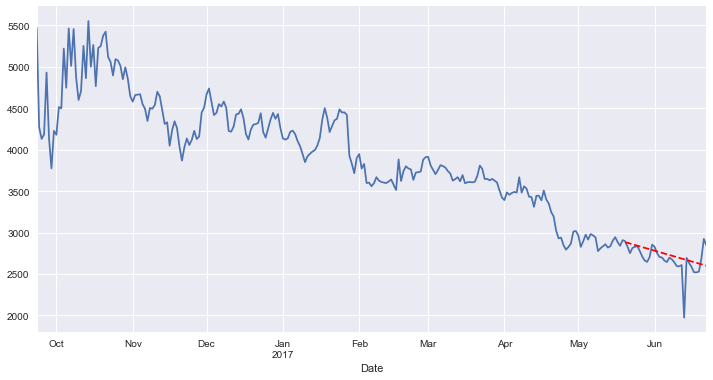

In [412]:
y_otg.plot(figsize=(12,6))
pred.plot(style='r--')

## try Prophet

In [44]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [39]:
predictions = 30

In [40]:
df_new=df_merge_revision_normal.reset_index()
df_new.colums=['Date','price']

In [42]:
train_df = df_new[:-predictions] 